<a href="https://colab.research.google.com/github/rashmi05pathak/project_New/blob/master/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# example of loading the mnist dataset
from keras.datasets import fashion_mnist
from matplotlib import pyplot


In [3]:
# load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

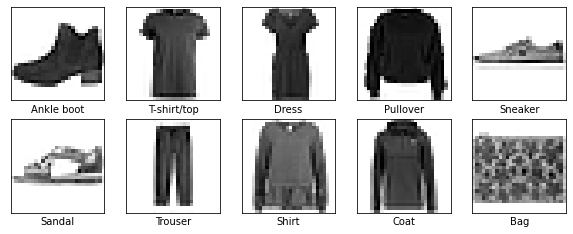

In [5]:
pyplot.figure(figsize=(10,10))
thisdict = {}
#printing 10 unique items of dictionary
for i in range(25):
    thisdict[train_labels[i]] = train_images[i]

i = 0
for x in thisdict:
    pyplot.subplot(5,5,i+1)
    i = i+1
    pyplot.xticks([])
    pyplot.yticks([])
    pyplot.grid(False)
    pyplot.imshow(thisdict[x], cmap=pyplot.cm.binary)
    pyplot.xlabel(class_names[x])
pyplot.show()

In [7]:
# Standardize data to have feature values between 0 and 1.
train_x = train_images/255.
test_x = test_images/255.
# Reshape the training and test examples
train_x_flatten = train_x.reshape(train_x.shape[0], -1).T 
#,→ The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x.reshape(test_x.shape[0], -1).T

print(train_x_flatten.shape)
print(test_x_flatten.shape)


(784, 60000)
(784, 10000)


In [ ]:
from random import seed
from random import random 
from math import exp
import numpy as np

In [ ]:
#initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
     network = list()
     
     for j in range(len(n_hidden)):
        hidden_layer = [{'weights':[random() for i in range(n_hidden[j]+1)]} for i in range(n_hidden[j])]
        network.append(hidden_layer)
     output_layer = [{'weights':[random() for i in range(n_hidden[j]+1)]} for i in range(n_outputs)]
     network.append(output_layer)
     return network

In [ ]:
seed(1)
arr = [1] #array for hidden layer
network = initialize_network(2,arr,2)
for layer in network:
    print(layer)

[{'weights': [0.13436424411240122, 0.8474337369372327]}]
[{'weights': [0.763774618976614, 0.2550690257394217]}, {'weights': [0.49543508709194095, 0.4494910647887381]}]


In [ ]:
#calculate neuron pre_activation at level i
def pre_activate(weights,inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
      activation+=weights[i] * inputs[i]
    return activation

In [ ]:
#activation at level i using softmax function
def activate(activation,fun_type):
     if fun_type == 'Sigmoid':
        return 1.0/(1.0 + exp(-activation))
     if fun_type == 'tanh':
        return (np.exp(activation)-np.exp(-activation))/(np.exp(activation)+np.exp(-activation))
     if fun_type == 'Relu':
        return max(0.0, activation)

In [ ]:
#forward propogate input to a network output
def forward_propogate(network,row):
    inputs = row
    for layer in network:
      new_inputs = []
      for neuron in layer:
          activation = pre_activate(neuron['weights'],inputs)
          neuron['output'] = activate(activation,'Sigmoid') #Here using sigmoid/tanh/relu as activation function 
          new_inputs.append(neuron['output'])
      inputs = new_inputs
    return inputs    

In [ ]:
# test forward propagation
network = [[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}],
		      [{'weights': [0.2550690257394217, 0.49543508709194095]}, {'weights': [0.4494910647887381, 0.651592972722763]}]]
row = [1, 0, None]
output = forward_propogate(network, row)
print(output)

[0.6629970129852887, 0.7253160725279748]


In [ ]:
#calculate the derivative of a neuron output (we are using sigmoid transfer function)
def transfer_derivative(output):
    return output*(1.0 - output)

In [ ]:
#Backpropogation error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])


In [ ]:
# test backpropagation of error
network = [[{'output': 0.7105668883115941, 'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}],
		[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095]}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763]}]]
expected = [0, 1]
backward_propagate_error(network, expected)
for layer in network:
	print(layer)

[{'output': 0.7105668883115941, 'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614], 'delta': -0.0005348048046610517}]
[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095], 'delta': -0.14619064683582808}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763], 'delta': 0.0771723774346327}]


In [ ]:
# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] += l_rate * neuron['delta']

In [ ]:
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))